# Stima del CPU burst

Non conoscendo a priori il tempo di esecuzione di un processo, il sistema operativo deve stimarlo.
In particolare, deve stimare il tempo di CPU burst, ovvero il tempo che il processo impiegherà per eseguire la prossima istruzione.

Gli algoritmi noti che proveremo a realizzare in questo notebook sono i seguenti:
- Simple moving average
- Exponential moving average

## Simple moving average (SMA)

Uno degli algoritmi usati per stimare il tempo di CPU burst è il *simple moving average*, che prevede di calcolare la media aritmetica tra l'effettivo (cioè reale) tempo di CPU burst passato e il tempo di CPU burst stimato.

Per il calcolo della stima abbiamo bisogno dei seguenti dati:

- La quantità di tempo **reale** richiesta per il *burst* al tempo `t`.
- La quantità di tempo **stimata** per il *burst* al tempo `t`.
- Il *peso* che decidiamo di assegnare al tempo **stimato**.
- Il *peso* che decidiamo di assegnare al tempo **reale**.

Nell'algoritmo di simple moving average, i *pesi* sono coefficienti **uguali** e la loro somma deve essere 1.

### Algebra

Il calcolo della stima avviene nel seguente modo:

$$
\begin{align}
\text{stima}_{t+1} &= \text{peso}_{\text{reale}} \cdot \text{reale}_{t} + \text{peso}_{\text{stimato}} \cdot \text{stima}_{t} \\
\text{stima}_{t+2} &= \text{peso}_{\text{reale}} \cdot \text{reale}_{t+1} + \text{peso}_{\text{stimato}} \cdot \text{stima}_{t+1} \\
\text{stima}_{t+3} &= \ldots
\end{align}
$$
con il vincolo che:
$$
\begin{align}
\text{peso}_{\text{reale}} &= \text{peso}_{\text{stimato}} \\
\text{peso}_{\text{reale}} + \text{peso}_{\text{stimato}} &= 1 
\end{align}
$$


### Algoritmo

In [58]:
def simple_moving_average(stima_precedente, reale_precedente):
    stima_attuale = 0.5 * stima_precedente + 0.5 * reale_precedente
    return stima_attuale

simple_moving_average(1, 2)

1.5

### Esempio 

Come lavora il *weighted moving average*?

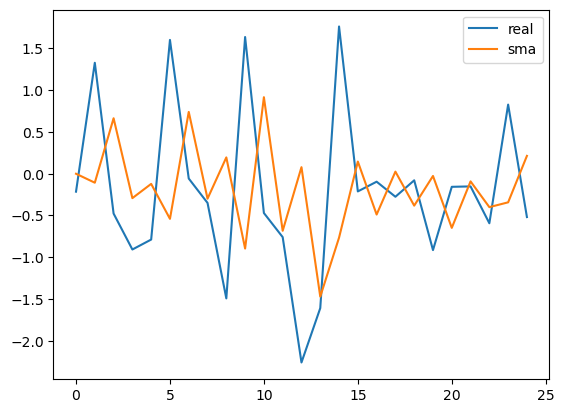

In [64]:
import numpy as np
values = np.random.randn(25)
sma = [0]
for i in np.arange(len(values)-1):
    sma.append(simple_moving_average(sma[i-1], values[i]))

import matplotlib.pyplot as plt
plt.plot(values, label='real')
plt.plot(sma, label='sma')
plt.legend()
plt.show()


## Exponential weighted moving average (EWMA)

**Problema!**
Il simple weighted average non è molto preciso, perché il peso che viene assegnato al tempo stimato è sempre lo stesso. 
In pratica, il tempo stimato viene sempre considerato con la stessa importanza, anche se il tempo stimato è molto diverso dal tempo reale.

Per correggere, usiamo il secondo algoritmo che proveremo a realizzare: *exponential moving average*. 
Questo algoritmo prevede di calcolare la media aritmetica tra l'effettivo (cioè reale) tempo di CPU burst passato e il tempo di CPU burst stimato, ma con un peso che decresce ad ogni iterazione (senza mai arrivare a 0).

A differenza del simple moving average, il peso che viene assegnato al tempo stimato è diverso a seconda del tempo, la loro somma è sempre 1 ma **non sono uguali**. 

### Algebra

Il calcolo della stima avviene nel seguente modo:

$$
\begin{align}
\text{stima}_{t+1} &= \text{peso} \cdot \text{reale}_{t} + (1 - \text{peso}) \cdot \text{stima}_{t} \\
\text{stima}_{t+2} &= \text{peso} \cdot \text{reale}_{t+1} + (1 - \text{peso}) \cdot \text{stima}_{t+1} \\
\text{stima}_{t+3} &= \ldots
\end{align}
$$
con il vincolo che:
$$
\begin{align}
\text{peso} \in [0, 1]
\end{align}
$$



### Algoritmo

In [66]:
def exponential_moving_average(stima_precedente, reale_precedente, peso=0.5):
    stima_attuale = peso * reale_precedente + (1-peso) * stima_precedente
    return stima_attuale

exponential_moving_average(1, 2, 0.3)

1.2999999999999998

### Esempio

Come lavora il *exponential weighted moving average*?

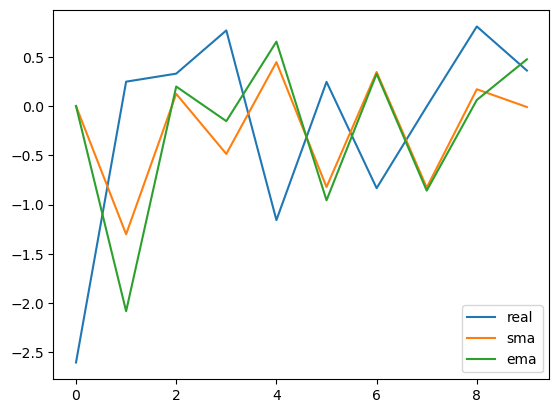

In [71]:
import numpy as np
values = np.random.randn(10)
sma = [0]
ema = [0]
for i in np.arange(len(values)-1):
    sma.append(simple_moving_average(sma[i-1], values[i]))
    ema.append(exponential_moving_average(ema[i-1], values[i], 0.8))

import matplotlib.pyplot as plt
plt.plot(values, label='real')
plt.plot(sma, label='sma')
plt.plot(ema, label='ema')
plt.legend()
plt.show()
